In [1]:
import torch
import numpy as np
import torchvision.models as models
import matplotlib.pyplot as plt
import pickle

In [2]:
densenet = models.densenet161(pretrained=True)s

Let us look at DenseNet.

https://openaccess.thecvf.com/content_cvpr_2017/papers/Huang_Densely_Connected_Convolutional_CVPR_2017_paper.pdf

In [3]:
densenet

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [4]:
aln_lin_1 = densenet.classifier.weight[:].detach().numpy()
print("aln_lin_1", aln_lin_1.shape)

aln_lin_1 (1000, 2208)


In [5]:
from analyze_model import Plot2DMatrix, PlotVectorSizes

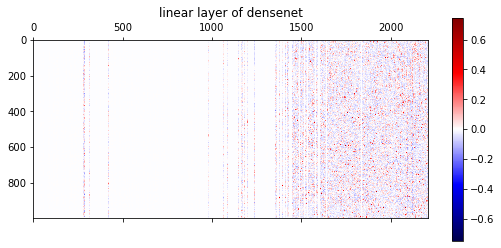

100%|██████████| 1000/1000 [00:04<00:00, 218.40it/s]

There are totally 0 zero elements in this matrix, percentage is 0.0


In [8]:
Plot2DMatrix(aln_lin_1, "linear layer of densenet", color_map="seismic")

Now, let us do some pruning on the fully connected layer.

In [9]:
import torch.nn.utils.prune as prune

## global pruning
parameters_to_prune = (
    (densenet.classifier, 'weight'),
)

# Here we compress the model by 80%, other compression rates also apply as a input parameter.
prune.global_unstructured(
    parameters_to_prune,
    pruning_method=prune.L1Unstructured,
    amount=0.8,
)

print(
    "Sparsity in fullyconnected_1.weight: {:.2f}%".format(
        100. * float(torch.sum(densenet.classifier.weight == 0))
        / float(densenet.classifier.weight.nelement())
    )
)

Sparsity in fullyconnected_1.weight: 80.00%


In [10]:
compressed_aln_lin_1 = densenet.classifier.weight[:].detach().numpy()
print("compressed_aln_lin_1", compressed_aln_lin_1.shape)

compressed_aln_lin_1 (1000, 2208)


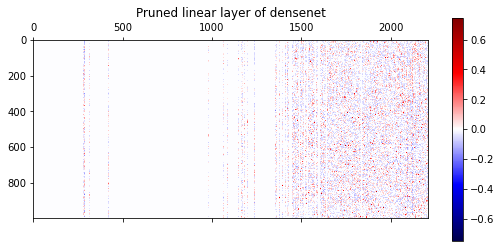

100%|██████████| 1000/1000 [00:04<00:00, 214.53it/s]

There are totally 1766400 zero elements in this matrix, percentage is 0.8


In [11]:
Plot2DMatrix(compressed_aln_lin_1, "Pruned linear layer of densenet", color_map="seismic")

100%|██████████| 1000/1000 [00:04<00:00, 217.37it/s]


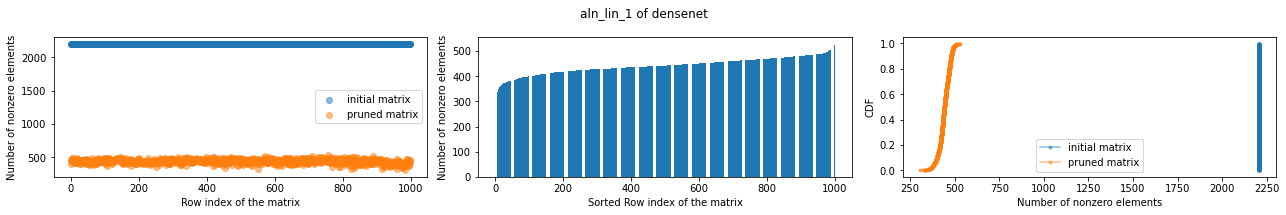

In [12]:
PlotVectorSizes(aln_lin_1, compressed_aln_lin_1, "aln_lin_1 of densenet", plot_two_matrces=True)

In [14]:
pickle.dump(aln_lin_1, open("../../data/saved_models/densenet/aln_lin_1.p", "wb" ))
pickle.dump(compressed_aln_lin_1, open("../../data/saved_models/densenet/compressed_80_aln_lin_1.p", "wb" ))

print("model saved in pickle files")

model saved in pickle files
